In [1]:
import pandas as pd
import numpy as np
import jieba.analyse

In [2]:
stopWords = []
with open('data/stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [3]:
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [4]:
with open('data/ner.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)
        

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Peggy\AppData\Local\Temp\jieba.cache
Loading model cost 1.474 seconds.
Prefix dict has been built successfully.


In [5]:
df_terms = pd.read_csv('博物館服務相關經驗調查問卷 (回覆) - 表單回應 1.csv')
df_terms.head()

時間戳記   性別      年齡          生活階段 姓名或稱呼 最近2年參觀博物館的頻率  \
0  2022/9/25 下午 11:29:32  生理女  19-25歲  學生族群：單身，學生身份   try      每個月1-3次   
1  2022/9/27 下午 11:33:58  生理男  19-25歲  學生族群：單身，學生身份  Suga       每年3次以內   
2  2022/9/27 下午 11:35:18  生理男  19-25歲  學生族群：單身，學生身份   徐紀鵬       每年3次以內   
3  2022/9/27 下午 11:38:45  生理女  19-25歲  學生族群：單身，學生身份     無       每年3次以內   
4  2022/9/27 下午 11:41:45  生理男  19-25歲  學生族群：單身，學生身份   高崧銓      每半年3次以內   

                                  曾經去過的大型展演空間（可複選）\n  \
0                                     臺北當代藝術館, 奇美博物館   
1  奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園...   
2  臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂...   
3                   奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區   
4  臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松...   

                                        看展的喜好方式（可複選） 簡單與我們分享讓你印象深刻的博物館服務  \
0                                            走馬看花隨性看                 NaN   
1                                  走馬看花隨性看, 和朋友邊看邊討論                 NaN   
2                                  走馬看花隨性看, 和朋友邊看邊討論                 NaN   
3  租借導覽機, 走馬看花隨性看, 自己閱讀手冊或說明牌, 和朋友邊看邊討論, 一定要拍照, 一...               打卡抽小卡   
4  走馬看花隨性看, 會跟著排隊參與體驗, 聽導覽員解說, 自己閱讀手冊或說明牌, 和朋友邊看邊...                 NaN   

  您過去參觀「台北當代藝術館」的次數  對 「台北當代藝術館」的整體印象好感度 對 「台北當代藝術館」的滿意度 [導覽服務]  \
0              2次以下                    1                      3   
1              都沒去過                    3                    NaN   
2              2次以下                    4                5（非常滿意）   
3              都沒去過                    4                    NaN   
4              2次以下                    4                      4   

  對 「台北當代藝術館」的滿意度 [館內標示] 對 「台北當代藝術館」的滿意度 [空間規劃] 對 「台北當代藝術館」的滿意度 [顧客服務]  \
0                      3                      3                      3   
1                    NaN                    NaN                    NaN   
2                5（非常滿意）                      4                      4   
3                    NaN                    NaN                    NaN   
4                      3                      3                      4   

  對 「台北當代藝術館」的滿意度 [周邊景點] 簡單與我們分享對 「台北當代藝術館」印象深刻的體驗 請問您是否願意接受我們進一步的深度訪談（約一小時）  \
0                      3                       NaN                         否   
1                    NaN                       NaN                         否   
2                      4                       NaN                         否   
3                    NaN                       NaN                         否   
4                      4                       NaN                         否   

  若您有意願，請留下您的聯絡資料（Email/手機號碼擇一）  Unnamed: 19  
0                           NaN          NaN  
1                           NaN          NaN  
2                           NaN          NaN  
3                           NaN          NaN  
4                           NaN          NaN

In [6]:
error_lst = []
terms=[]
for i in range(len(df_terms['曾經去過的大型展演空間（可複選）\n'])):
    try:
        for j in list(jieba.cut(df_terms['曾經去過的大型展演空間（可複選）\n'][i], cut_all = False)):
            if j not in stopWords:
                terms.append(j)
    except:
        error_lst.append([i, df_terms['曾經去過的大型展演空間（可複選）\n'][i]])

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba
import codecs
import jieba.posseg as pseg

In [8]:
names = {}          
relationships = {}  
lineNames = []  
for i in range(len(df_terms['曾經去過的大型展演空間（可複選）\n'])):
    try:
        poss = jieba.cut(df_terms['曾經去過的大型展演空間（可複選）\n'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:    
                relationships[w] = {}            
    except:
        pass

In [9]:
term_dic = dict()
for sentence in lineNames:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}
            

In [10]:
for i in range(len(lineNames)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][df_terms['曾經去過的大型展演空間（可複選）\n'][i]] = num

In [11]:
TDM = pd.DataFrame.from_dict(term_dic)
TDM.head()

臺北當代藝術館  奇美博物館  國立臺灣歷史博物館  \
臺北當代藝術館, 奇美博物館                                            1      1          0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...        0      1          1   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...        1      1          0   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                          0      1          0   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...        1      1          1   

                                                    國立故宮博物院  國父紀念館  中正紀念堂  \
臺北當代藝術館, 奇美博物館                                            0      0      0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...        1      1      1   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...        1      1      1   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                          0      0      1   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...        1      0      0   

                                                    松菸文創園區  華山文化創意產業園區  \
臺北當代藝術館, 奇美博物館                                           0           0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...       1           1   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...       1           1   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                         1           1   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...       1           1   

                                                    國立台灣美術館  臺北市立美術館  ...  \
臺北當代藝術館, 奇美博物館                                            0        0  ...   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...        0        0  ...   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...        1        1  ...   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                          0        0  ...   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...        0        1  ...   

                                                    達利戲劇博物館  國立臺灣博物館本館  \
臺北當代藝術館, 奇美博物館                                            0          0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...        0          0   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...        0          0   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                          0          0   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...        0          0   

                                                    國立臺灣博物館鐵道部  樹火紀念紙博物館  \
臺北當代藝術館, 奇美博物館                                               0         0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...           0         0   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...           0         0   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                             0         0   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...           0         0   

                                                    台南市美術館2館  高雄金馬賓館  高雄科工館  \
臺北當代藝術館, 奇美博物館                                             0       0      0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...         0       0      0   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...         0       0      0   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                           0       0      0   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...         0       0      0   

                                                    世界宗教博物館  國立台灣科學教育館  \
臺北當代藝術館, 奇美博物館                                            0          0   
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...        0          0   
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...        0          0   
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                          0          0   
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術館, 松菸...        0          0   

                                                    日本金澤21世紀美術館  
臺北當代藝術館, 奇美博物館                                                0  
奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 國父紀念館, 中正紀念堂, 松菸文創園區...            0  
臺北當代藝術館, 奇美博物館, 國立故宮博物院, 國父紀念館, 國立台灣美術館, 中正紀念堂,...            0  
奇美博物館, 中正紀念堂, 松菸文創園區, 華山文化創意產業園區                              0  
臺北當代藝術館, 奇美博物館, 國立臺灣歷史博物館, 國立故宮博物院, 臺北市立美術

In [12]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['曾經去過的大型展演空間（可複選）\n'])):
    try:
        poss = jieba.cut(df_terms['曾經去過的大型展演空間（可複選）\n'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 0]

In [13]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

上海當代藝術博物館  中正紀念堂  日本新美術館  國立臺灣歷史博物館  臺北市立美術館  國立台灣美術館  嘉義文化創意產業園區  \
上海當代藝術博物館        NaN    3.0     NaN        2.0      1.0      2.0         1.0   
中正紀念堂            3.0    NaN     NaN       29.0     44.0     34.0        10.0   
日本新美術館           NaN    NaN     NaN        1.0      1.0      1.0         NaN   
國立臺灣歷史博物館        2.0   29.0     1.0        NaN     25.0     18.0        11.0   
臺北市立美術館          1.0   44.0     1.0       25.0      NaN     32.0        10.0   

           世界宗教博物館  松菸文創園區  國立臺灣博物館鐵道部  ...  橘園  日本金澤21世紀美術館  國立台灣科學教育館  \
上海當代藝術博物館      NaN     3.0         NaN  ... NaN          NaN        NaN   
中正紀念堂          1.0    67.0         NaN  ... NaN          1.0        1.0   
日本新美術館         NaN     1.0         NaN  ... NaN          NaN        NaN   
國立臺灣歷史博物館      NaN    34.0         NaN  ... NaN          NaN        NaN   
臺北市立美術館        1.0    49.0         NaN  ... NaN          NaN        1.0   

           高雄科工館  國立臺灣博物館本館  梵谷博物館  台中科博館  梵蒂岡西斯汀博物館  某個空軍什麼基地的  LAGetty  
上海當代藝術博物館    NaN        NaN    NaN    NaN        NaN        NaN      1.0  
中正紀念堂        1.0        NaN    NaN    NaN        NaN        1.0      NaN  
日本新美術館       NaN        NaN    NaN    NaN        1.0        NaN      NaN  
國立臺灣歷史博物館    NaN        NaN    NaN    NaN        1.0        NaN      NaN  
臺北市立美術館      1.0        NaN    1.0    NaN        1.0        1.0      NaN  

[5 rows x 37 columns]

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

In [15]:
import matplotlib
print(matplotlib.__file__)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py


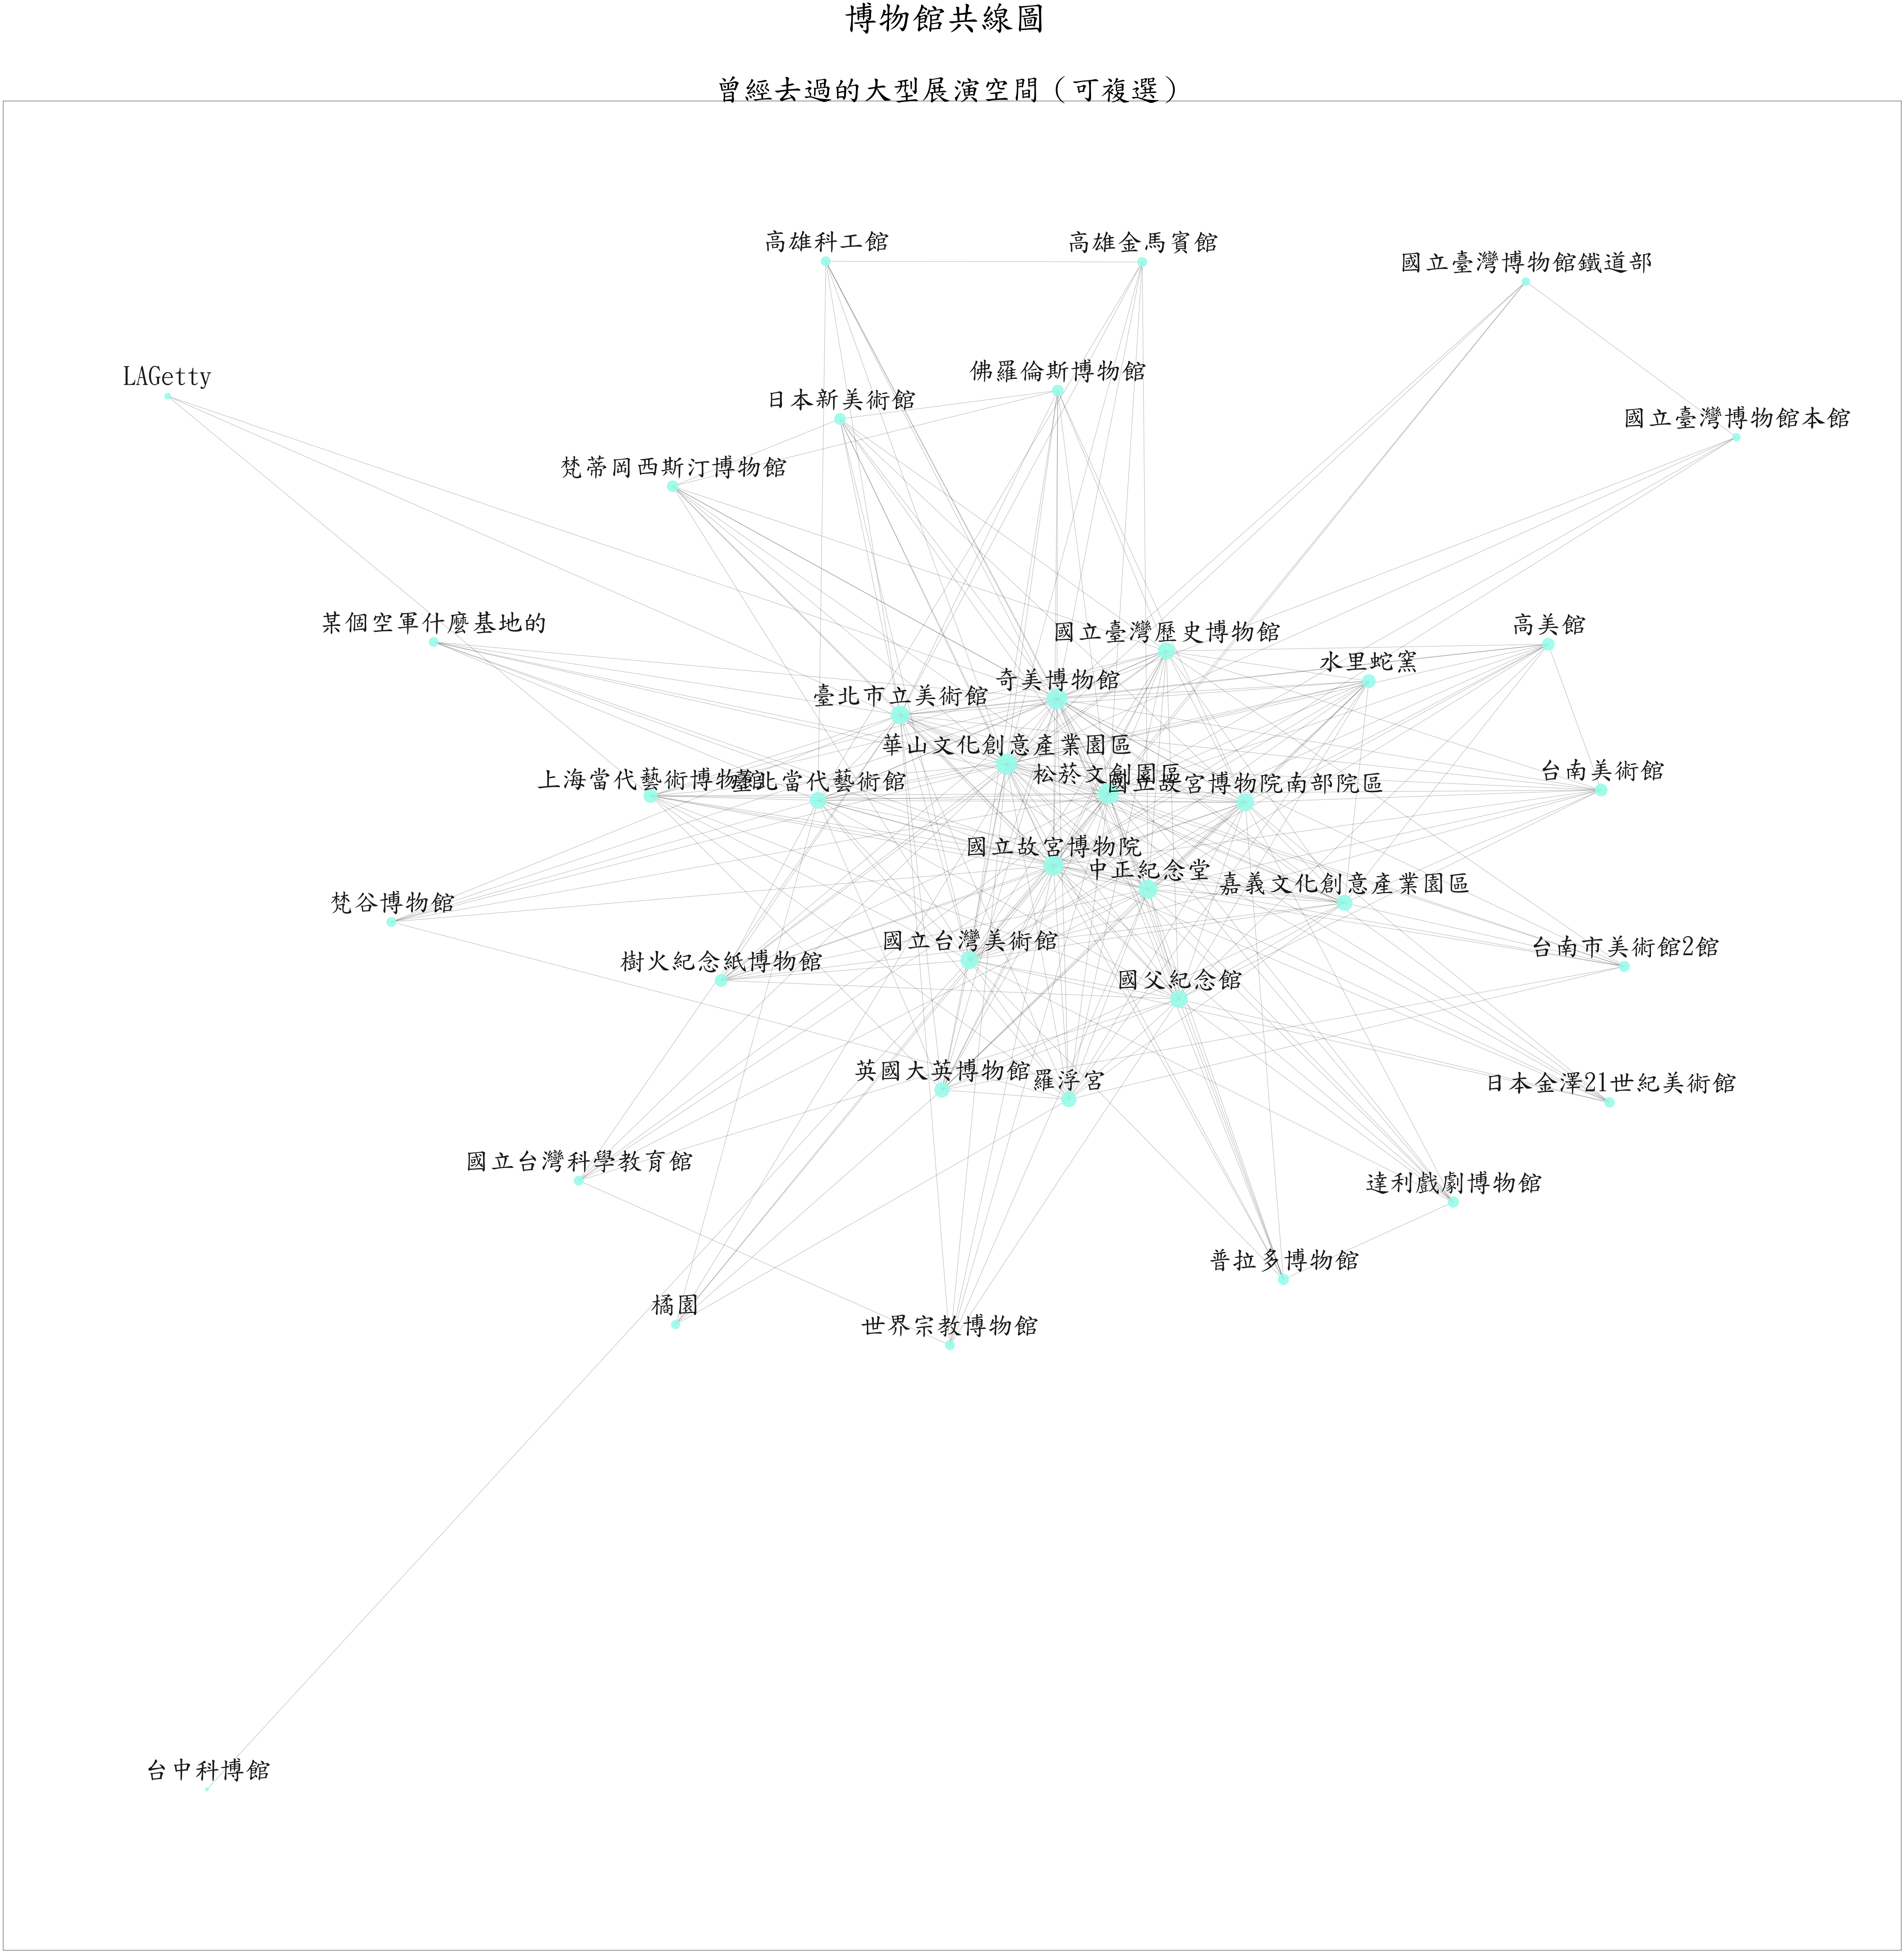

In [20]:
plt.figure(figsize=(80,80))
plt.rcParams['font.sans-serif'] = ['DFKai-SB']   
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.9,node_size=[val*70 for (node, val) in g.degree()], node_color='#97FCEA')
nx.draw_networkx_edges(g, pos, alpha=0.3)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.02
nx.draw_networkx_labels(g, pos, font_size = 60, font_family='sans-serif', alpha=0.9)
plt.title('曾經去過的大型展演空間（可複選）', size = 70)
plt.suptitle('博物館共線圖',x = 0.51,y=0.92, fontsize=80)
plt.show()

In [21]:
import plotly.express as px
fig = px.imshow(co_occurrence_matrix_by_records)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()